In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yasserh/air-passengers-forecast-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/air-passengers-forecast-dataset
License(s): CC0-1.0
  0% 0.00/771 [00:00<?, ?B/s]
100% 771/771 [00:00<00:00, 1.57MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/air-passengers-forecast-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from pylab import rcParams

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.describe()


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.isnull().sum()

,0
#Passengers,0


In [ ]:
duplicates = df.index[df.index.duplicated()]
print(duplicates)


DatetimeIndex([], dtype='datetime64[ns]', name='Month', freq=None)


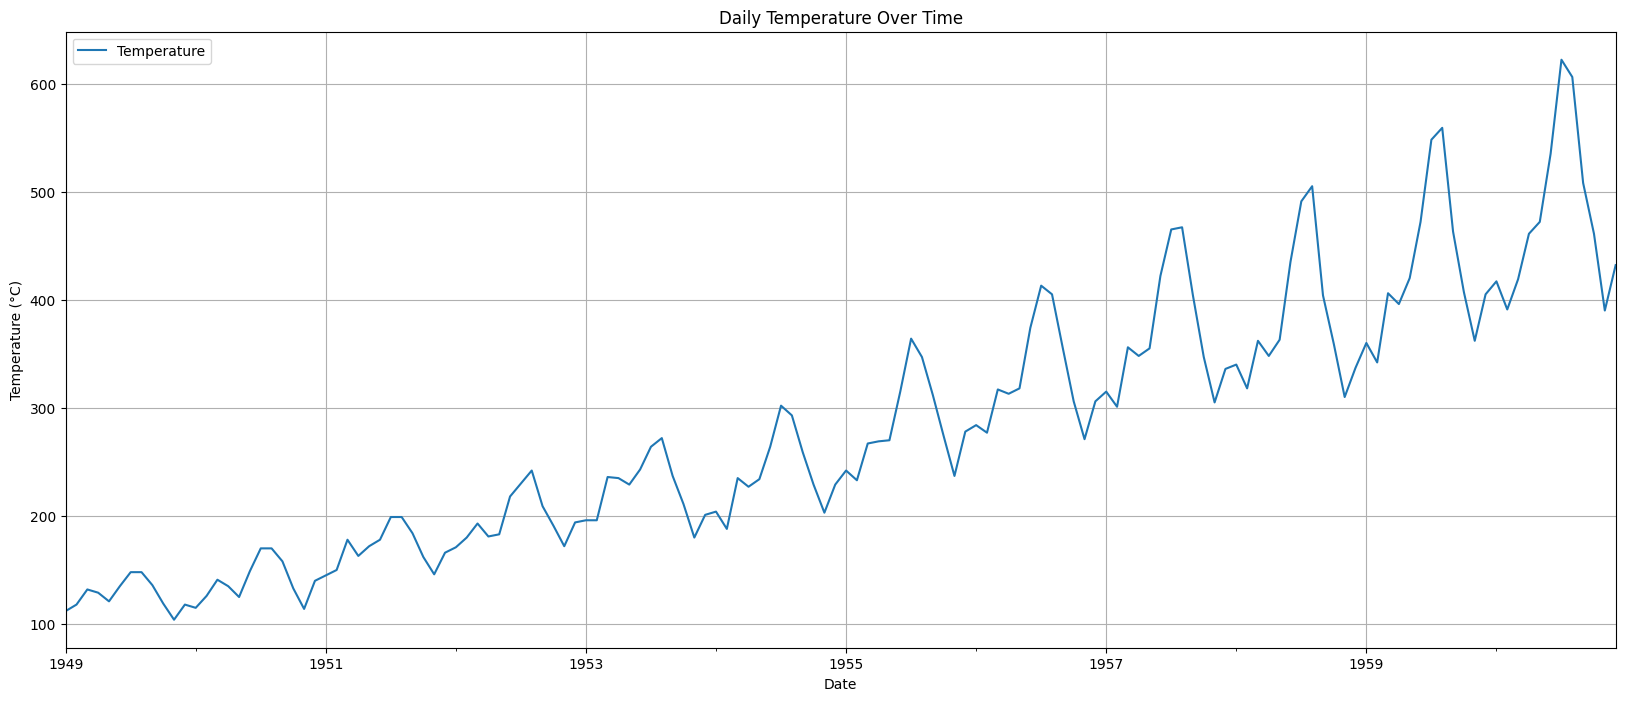

In [ ]:
rcParams['figure.figsize'] = 20, 8
df.plot(grid=True)
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(['Temperature'])
plt.show()

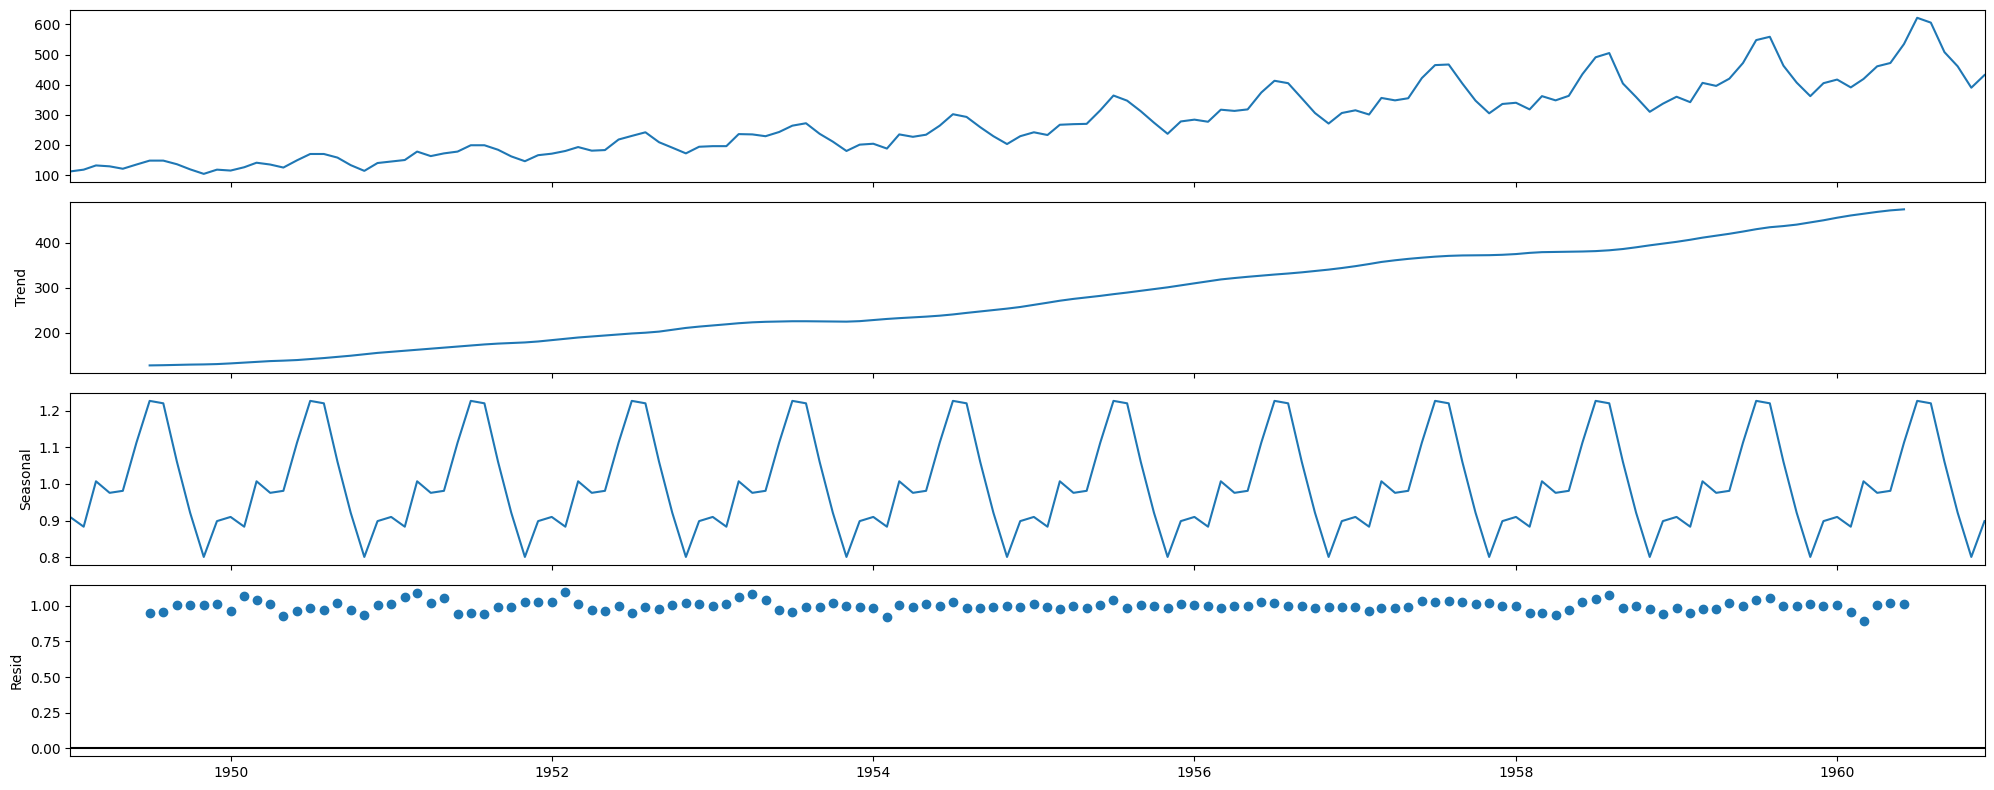

In [ ]:
decomposition = seasonal_decompose(df ,model='multiplicative')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','kjkn\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend kjkn
 Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
Name: trend, dtype: float64 

Seasonality 
 Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Name: seasonal, dtype: float64 

Residual 
 Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
Name: resid, dtype: float64 



In [ ]:
dftest = adfuller(df['#Passengers'], regression='ct')

# Print the results
print('ADF Statistic (Original):', dftest[0])
print('p-value (Original):', dftest[1])
print('Number of lags used (Original):', dftest[2])
print('Critical Values (Original):', dftest[4])
if dftest[1] < 0.05:
    print("The original time series is likely stationary.")
else:
    print("The original time series is likely non-stationary.")


ADF Statistic (Original): -2.100781813844672
p-value (Original): 0.5456589343124537
Number of lags used (Original): 13
Critical Values (Original): {'1%': -4.030152423759672, '5%': -3.444817634956759, '10%': -3.1471816659080565}
The original time series is likely non-stationary.


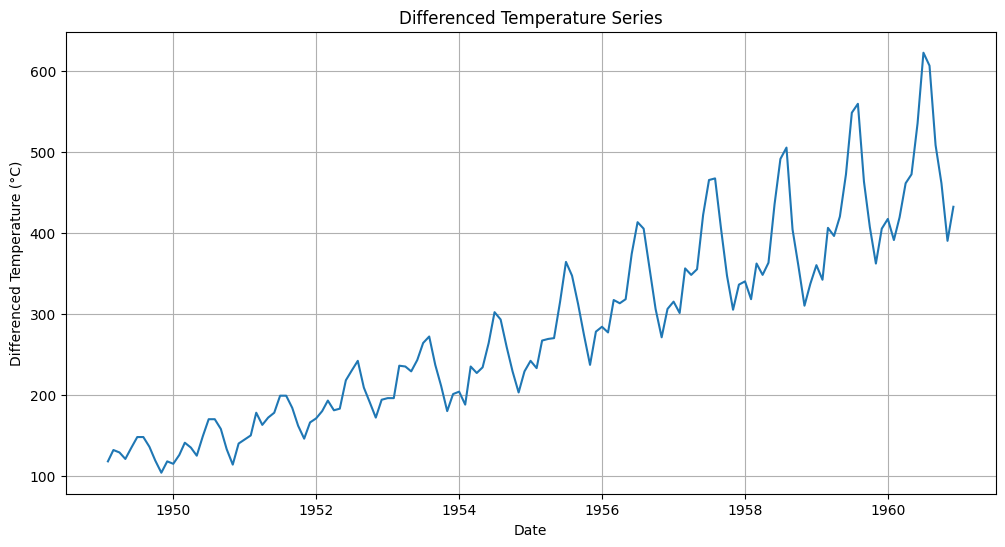

ADF Statistic (Differenced): -2.0923107999098898
p-value (Differenced): 0.5503998159473099
Number of lags used (Differenced): 13
Critical Values (Differenced): {'1%': -4.030719874481119, '5%': -3.4450882414779223, '10%': -3.1473396994394625}
The differenced time series is still likely non-stationary.


In [ ]:
# Apply first differencing
df['pass_diff1'] = df['#Passengers'].diff()

# Drop NaN values created by differencing
df.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['#Passengers'])
plt.title('Differenced Temperature Series')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature (°C)')
plt.grid(True)
plt.show()

# Perform ADF test on the differenced data
dftest_diff1 = adfuller(df['#Passengers'], regression='ct')

# Print the results
print('ADF Statistic (Differenced):', dftest_diff1[0])
print('p-value (Differenced):', dftest_diff1[1])
print('Number of lags used (Differenced):', dftest_diff1[2])
print('Critical Values (Differenced):', dftest_diff1[4])

# Interpretation
if dftest_diff1[1] < 0.05:
    print("The differenced time series is likely stationary.")
else:
    print("The differenced time series is still likely non-stationary.")



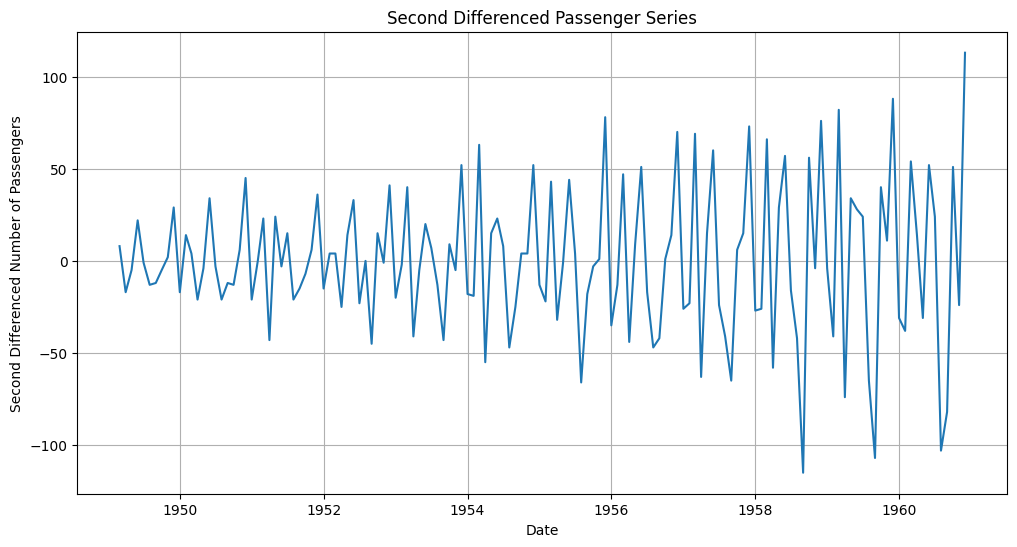

ADF Statistic (Second Differenced): -16.327250910692726
p-value (Second Differenced): 0.0
Number of lags used (Second Differenced): 11
Critical Values (Second Differenced): {'1%': -4.030152423759672, '5%': -3.444817634956759, '10%': -3.1471816659080565}
The second differenced time series is likely stationary.


In [ ]:
# Apply second differencing
df['pass_diff2'] = df['pass_diff1'].diff()

# Drop NaN values created by differencing
df.dropna(inplace=True)

# Plot the second differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pass_diff2'])
plt.title('Second Differenced Passenger Series')
plt.xlabel('Date')
plt.ylabel('Second Differenced Number of Passengers')
plt.grid(True)
plt.show()

# Perform ADF test on the second differenced data
dftest_diff2 = adfuller(df['pass_diff2'], regression='ct')

# Print the results
print('ADF Statistic (Second Differenced):', dftest_diff2[0])
print('p-value (Second Differenced):', dftest_diff2[1])
print('Number of lags used (Second Differenced):', dftest_diff2[2])
print('Critical Values (Second Differenced):', dftest_diff2[4])

# Interpretation
if dftest_diff2[1] < 0.05:
    print("The second differenced time series is likely stationary.")
else:
    print("The second differenced time series is still likely non-stationary.")


In [ ]:
df

,#Passengers,pass_diff1,pass_diff2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


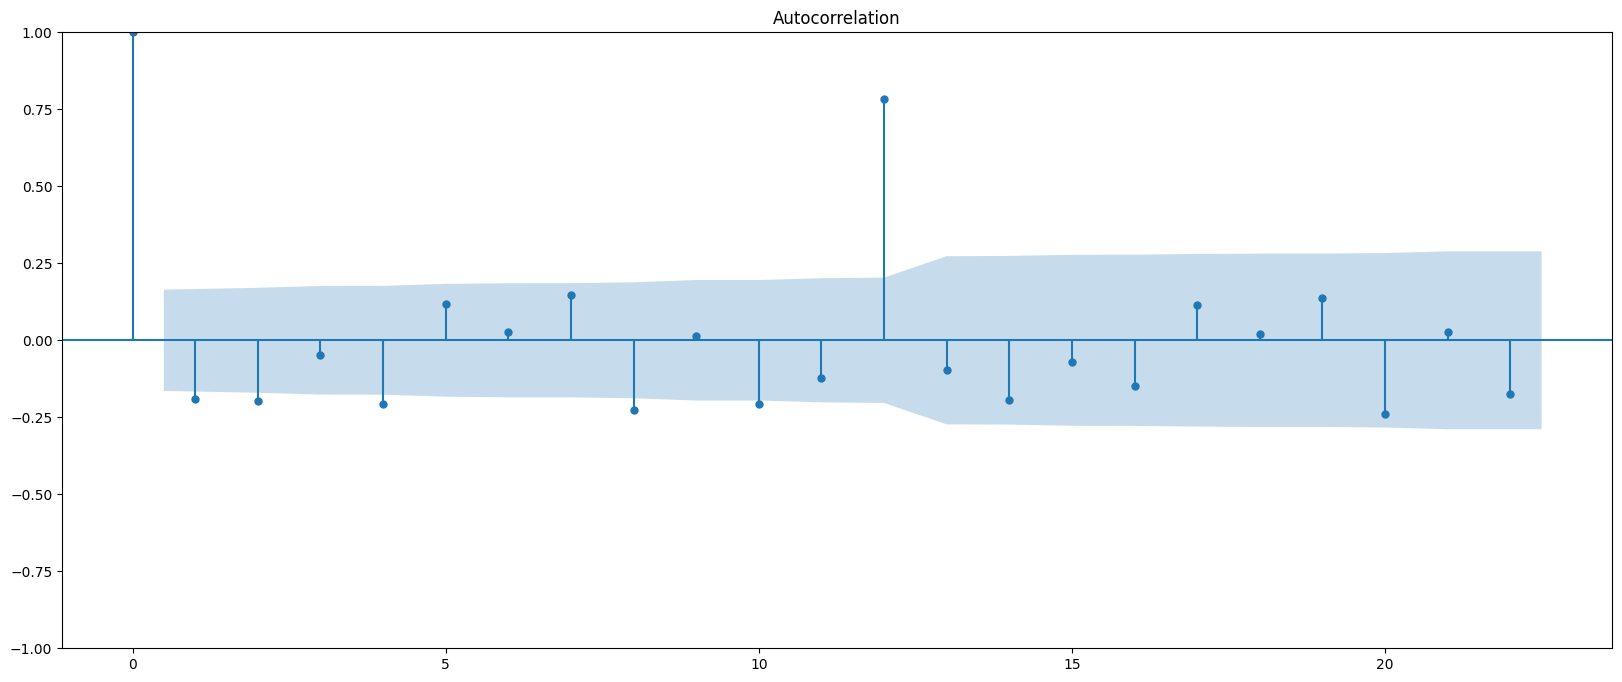

In [ ]:
plot_acf(df['pass_diff2'],alpha=0.05);

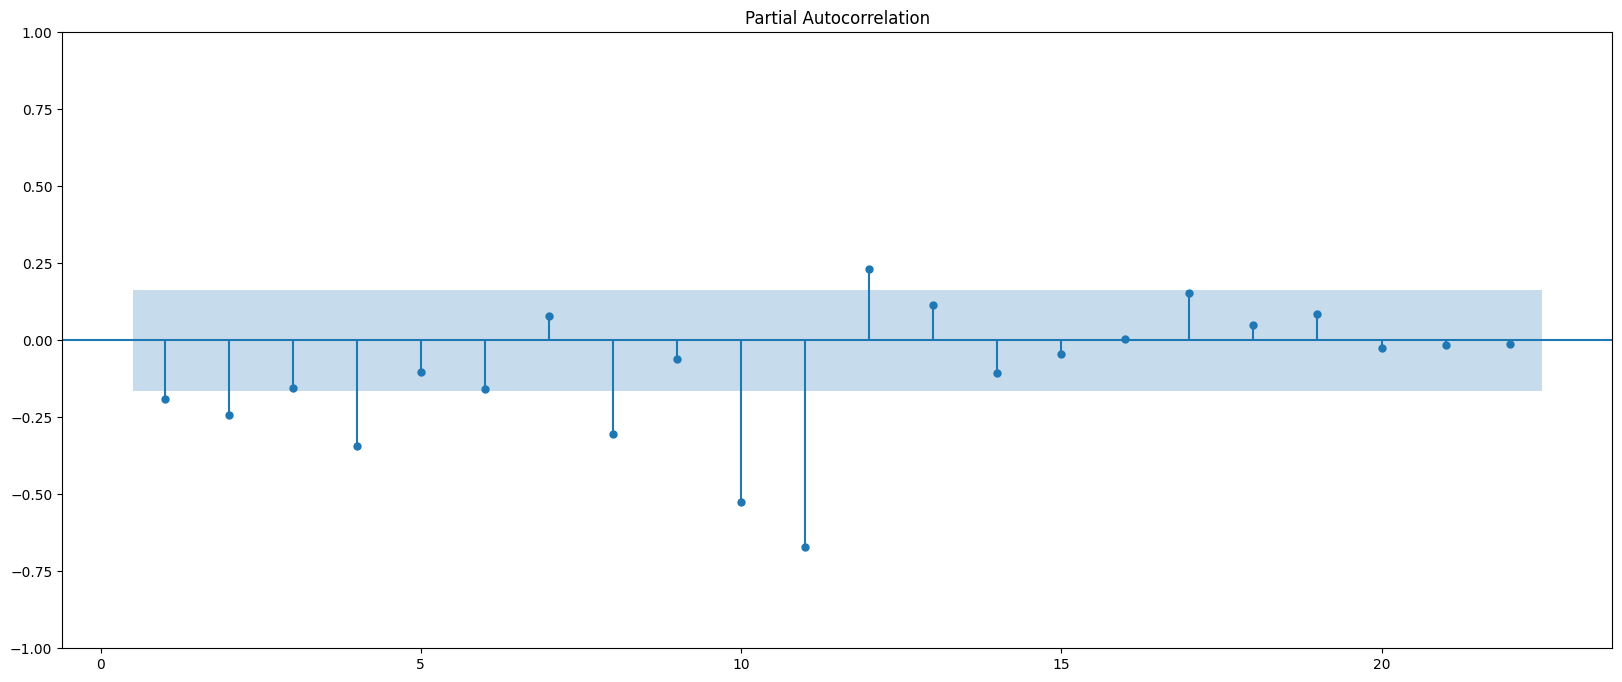

In [ ]:
plot_pacf(df['pass_diff2'],zero=False,alpha=0.05);

In [ ]:
df

,#Passengers,pass_diff1,pass_diff2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [ ]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]
test = df.iloc[split_point:]

# Print shapes of training and testing sets
print(f"Training set shape: {train.shape}")
print(f"Testing set shape: {test.shape}")

# Display the first few rows of the training and testing sets
print("\nTraining Set:")
print(train.head())

print("\nTesting Set:")
print(test.head())


Training set shape: (113, 3)
Testing set shape: (29, 3)

Training Set:
            #Passengers  pass_diff1  pass_diff2
Month                                          
1949-03-01          132        14.0         8.0
1949-04-01          129        -3.0       -17.0
1949-05-01          121        -8.0        -5.0
1949-06-01          135        14.0        22.0
1949-07-01          148        13.0        -1.0

Testing Set:
            #Passengers  pass_diff1  pass_diff2
Month                                          
1958-08-01          505        14.0       -42.0
1958-09-01          404      -101.0      -115.0
1958-10-01          359       -45.0        56.0
1958-11-01          310       -49.0        -4.0
1958-12-01          337        27.0        76.0


In [ ]:
train_diff2 = train['pass_diff2']
test_diff2 = test['pass_diff2']

# Auto Regression(AR Model)

**Theory:** An AR model predicts the value of a time series based on its own previous values. The model is essentially a linear regression of the current value on its past values.

**Equation:**

$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
$$

**Parameters:**

- **$\phi$**: Coefficients for the lagged values  
- **$p$**: Number of lags (AR order)  
- **$\epsilon_t$**: White noise error term


In [ ]:
# Fit the AR model
ar_model = AutoReg(train_diff2, lags=11)
ar_fit = ar_model.fit()
ar_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             pass_diff2   No. Observations:                  113
Model:                    AutoReg(11)   Log Likelihood                -370.618
Method:               Conditional MLE   S.D. of innovations              9.157
Date:                Mon, 12 Aug 2024   AIC                            767.236
Time:                        04:10:37   BIC                            801.361
Sample:                    02-01-1950   HQIC                           781.054
                         - 07-01-1958                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0886      0.908      0.098      0.922      -1.692       1.869
pass_diff2.L1     -0.9372      0.044    -21.107      0.000      -1.024      -0.850
pass_diff2.L2     -0.9749      0.040    -24.481      0.000      -1.053      -0.897
pass_diff2.L3     -0.9365      0.052    -18.095      0.000      -1.038      -0.835
pass_diff2.L4     -0.9964      0.045    -22.331      0.000      -1.084      -0.909
pass_diff2.L5     -0.9297      0.056    -16.556      0.000      -1.040      -0.820
pass_diff2.L6     -0.9850      0.053    -18.716      0.000      -1.088      -0.882
pass_diff2.L7     -0.9626      0.057    -16.902      0.000      -1.074      -0.851
pass_diff2.L8     -1.0493      0.047    -22.199      0.000      -1.142      -0.957
pass_diff2.L9     -1.0163      0.055    -18.481      0.000      -1.124      -0.908
pass_diff2.L10    -1.0999      0.043    -25.450      0.000      -1.185      -1.015
pass_diff2.L11    -0.9927      0.049    -20.138      0.000      -1.089      -0.896
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0588           -0.0000j            1.0588           -0.5000
AR.2            -0.8687           -0.4958j            1.0002           -0.4175
AR.3            -0.8687           +0.4958j            1.0002            0.4175
AR.4            -0.5058           -0.8607j            0.9984           -0.3346
AR.5            -0.5058           +0.8607j            0.9984            0.3346
AR.6            -0.0004           -0.9981j            0.9981           -0.2501
AR.7            -0.0004           +0.9981j            0.9981            0.2501
AR.8             0.4908           -0.8589j            0.9892           -0.1674
AR.9             0.4908           +0.8589j            0.9892            0.1674
AR.10            0.8595           -0.4898j            0.9893           -0.0824
AR.11            0.8595           +0.4898j            0.9893            0.0824
------------------------------------------------------------------------------
"""

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Make predictions on the test set
ar_predictions_diff2 = ar_fit.predict(start=len(train_diff2), end=len(train_diff2) + len(test_diff2) - 1)
last_known_value = df['#Passengers'].iloc[split_point - 1]
ar_predictions_cumsum = ar_predictions_diff2.cumsum() + last_known_value

# Add the predictions to the test DataFrame
test['ar_predictions'] = ar_predictions_cumsum

# Print the first few rows of the test set with predictions
print(test.head())

# Calculate RMSE
ar_rmse = sqrt(mean_squared_error(test['#Passengers'], test['ar_predictions']))
print(f'AR Model RMSE: {ar_rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
<ipython-input-25-55312ed75b06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ar_predictions'] = ar_predictions_cumsum


            #Passengers  pass_diff1  pass_diff2  ar_predictions
Month                                                          
1958-08-01          505        14.0       -42.0      437.465792
1958-09-01          404      -101.0      -115.0      366.684504
1958-10-01          359       -45.0        56.0      369.670230
1958-11-01          310       -49.0        -4.0      390.709913
1958-12-01          337        27.0        76.0      467.794494
AR Model RMSE: 75.81838714121825


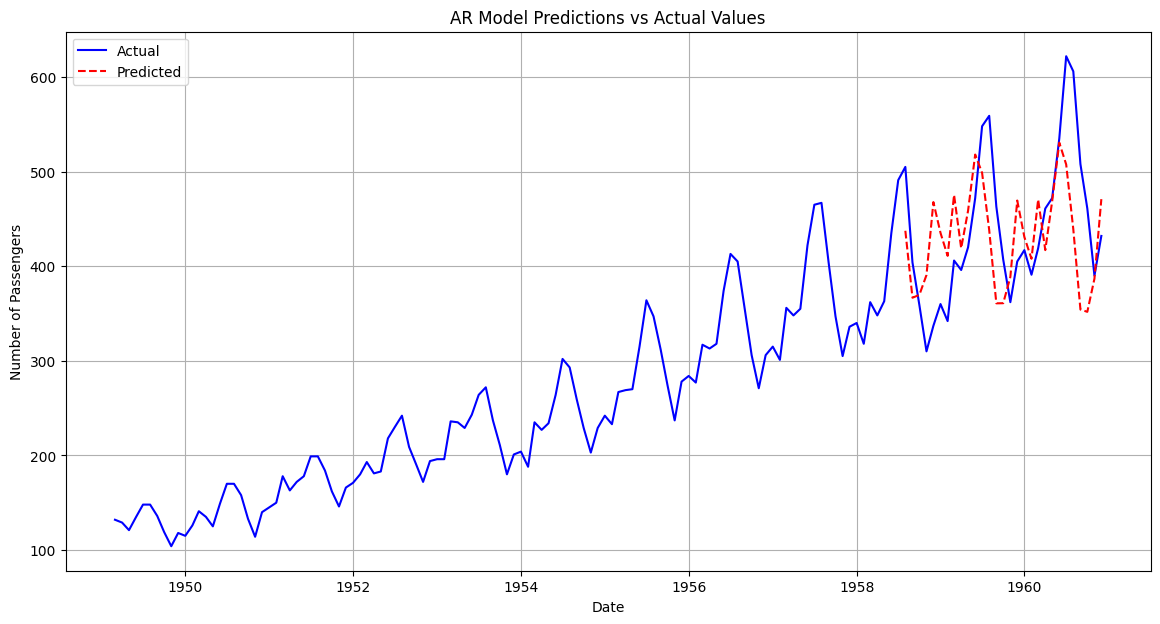

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['#Passengers'], label='Actual', color='blue')
plt.plot(test.index, test['ar_predictions'], label='Predicted', color='red', linestyle='--')
plt.title('AR Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast_steps = 12
forecast_values = []

# Start with the last known value from the historical data
forecast_last_value = df['#Passengers'].iloc[-1]

# Use the AR model to predict future values iteratively
for i in range(forecast_steps):
    future_date = df.index[-1] + pd.DateOffset(months=i + 1)
    future_diff = forecast_last_value - df['#Passengers'].iloc[-1]
    future_data = pd.Series([future_diff], index=[future_date])
    extended_train_diff2 = pd.concat([train_diff2, future_data])

    # Predict the next value
    forecast_diff2 = ar_fit.predict(start=len(extended_train_diff2) - 1, end=len(extended_train_diff2))
    forecast_value = forecast_diff2.iloc[0] + forecast_last_value

    # Update the forecast values list
    forecast_values.append(forecast_value)

    # Update the last known value for the next iteration
    forecast_last_value = forecast_value

# Create DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_i

In [ ]:
# Print the forecast DataFrame
print(forecast_df)

              Forecast
1961-01-31  378.465792
1961-02-28  324.931585
1961-03-31  271.397377
1961-04-30  217.863170
1961-05-31  164.328962
1961-06-30  110.794755
1961-07-31   57.260547
1961-08-31    3.726340
1961-09-30  -49.807868
1961-10-31 -103.342075
1961-11-30 -156.876283
1961-12-31 -210.410490


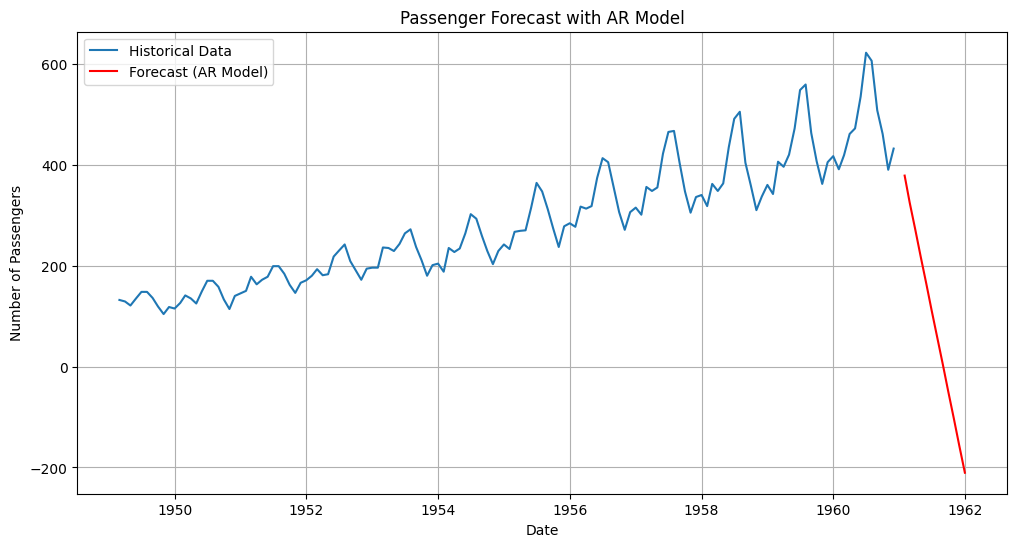

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['#Passengers'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast (AR Model)')
plt.title('Passenger Forecast with AR Model')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


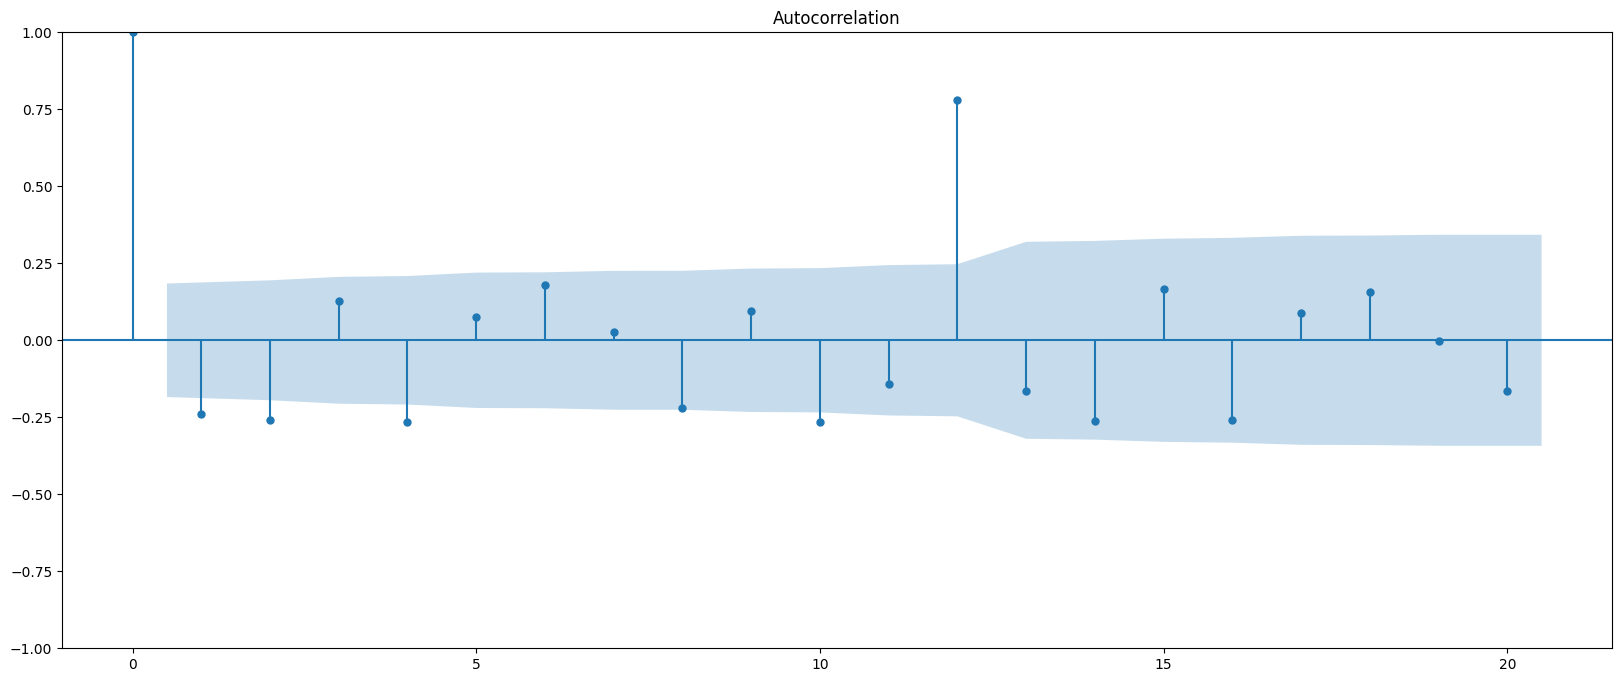

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for the differenced series
plot_acf(train['pass_diff2'].dropna(), lags=20)
plt.show()


#Moving Average(MA) Model

**Theory:** An MA model forecasts future values based on past forecast errors. It models the relationship between an observation and residual errors from a moving average model applied to lagged forecast errors.

**Equation:**

$$
X_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t
$$

**Parameters:**

- **$\theta$**: Coefficients for the lagged errors  
- **$q$**: Number of lagged forecast errors (MA order)  
- **$\mu$**: Mean of the series


In [ ]:
# Define the range of MA orders to test
ma_orders = range(1, 11)  # Testing MA orders from 1 to 10

# Initialize lists to store results
aic_values = []
bic_values = []

for q in ma_orders:
    # Fit the MA model
    ma_model = ARIMA(train['pass_diff2'].dropna(), order=(0, 0, q))
    ma_fit = ma_model.fit()

    # Store AIC and BIC values
    aic_values.append(ma_fit.aic)
    bic_values.append(ma_fit.bic)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'MA Order': ma_orders,
    'AIC': aic_values,
    'BIC': bic_values
})

print(results_df)

# Choose the MA order with the lowest AIC/BIC
optimal_order_aic = results_df.loc[results_df['AIC'].idxmin(), 'MA Order']
optimal_order_bic = results_df.loc[results_df['BIC'].idxmin(), 'MA Order']

print(f'Optimal MA Order (based on AIC): {optimal_order_aic}')
print(f'Optimal MA Order (based on BIC): {optimal_order_bic}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

   MA Order          AIC          BIC
0         1  1074.277262  1082.459426
1         2  1061.975787  1072.885338
2         3  1058.897680  1072.534619
3         4  1060.694030  1077.058357
4         5  1039.924474  1059.016189
5         6  1036.360485  1058.179588
6         7  1032.346217  1056.892708
7         8  1019.771330  1047.045208
8         9  1021.709072  1051.710338
9        10  1061.754586  1094.483240
Optimal MA Order (based on AIC): 8
Optimal MA Order (based on BIC): 8


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Fit the MA model (ARIMA model with AR=0 and I=0)
ma_model = ARIMA(train_diff2, order=(0, 0, 12))
ma_fit = ma_model.fit()
ma_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pass_diff2   No. Observations:                  113
Model:                ARIMA(0, 0, 12)   Log Likelihood                -493.120
Date:                Mon, 12 Aug 2024   AIC                           1014.241
Time:                        04:11:05   BIC                           1052.424
Sample:                    03-01-1949   HQIC                          1029.735
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.436      0.020      0.984      -0.846       0.863
ma.L1         -0.5426   2836.831     -0.000      1.000   -5560.630    5559.545
ma.L2         -0.0948   1247.768   -7.6e-05      1.000   -2445.676    2445.486
ma.L3         -0.0430    924.276  -4.65e-05      1.000   -1811.590    1811.504
ma.L4         -0.3040    738.182     -0.000      1.000   -1447.114    1446.506
ma.L5          0.1690    196.566      0.001      0.999    -385.094     385.432
ma.L6         -0.1348    218.914     -0.001      1.000    -429.199     428.929
ma.L7          0.0981    233.217      0.000      1.000    -456.999     457.195
ma.L8         -0.3357     20.606     -0.016      0.987     -40.724      40.052
ma.L9          0.1829   1039.022      0.000      1.000   -2036.263    2036.629
ma.L10        -0.5867    568.719     -0.001      0.999   -1115.255    1114.082
ma.L11         0.1260   2278.733   5.53e-05      1.000   -4466.109    4466.361
ma.L12         0.6765   1930.516      0.000      1.000   -3783.066    3784.419
sigma2       293.7613   8.38e+05      0.000      1.000   -1.64e+06    1.64e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.38   Prob(JB):                         0.88
Heteroskedasticity (H):               4.24   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions on the test set
ma_predictions_diff2 = ma_fit.predict(start=len(train_diff2), end=len(train_diff2) + len(test_diff2) - 1)
last_known_value = df['#Passengers'].iloc[split_point - 1]
ma_predictions_cumsum = ma_predictions_diff2.cumsum() + last_known_value

# Add the predictions to the test DataFrame
test['ma_predictions'] = ma_predictions_cumsum

# Print the first few rows of the test set with predictions
print(test.head())

# Calculate RMSE
ma_rmse = sqrt(mean_squared_error(test['#Passengers'], test['ma_predictions']))
print(f'MA Model RMSE: {ma_rmse}')


            #Passengers  pass_diff1  pass_diff2  ar_predictions  \
Month                                                             
1958-08-01          505        14.0       -42.0      437.465792   
1958-09-01          404      -101.0      -115.0      366.684504   
1958-10-01          359       -45.0        56.0      369.670230   
1958-11-01          310       -49.0        -4.0      390.709913   
1958-12-01          337        27.0        76.0      467.794494   

            ma_predictions  
Month                       
1958-08-01      467.443787  
1958-09-01      440.591039  
1958-10-01      417.043963  
1958-11-01      416.586140  
1958-12-01      449.707845  
MA Model RMSE: 74.09107108351019


<ipython-input-33-8f289c9b82c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ma_predictions'] = ma_predictions_cumsum


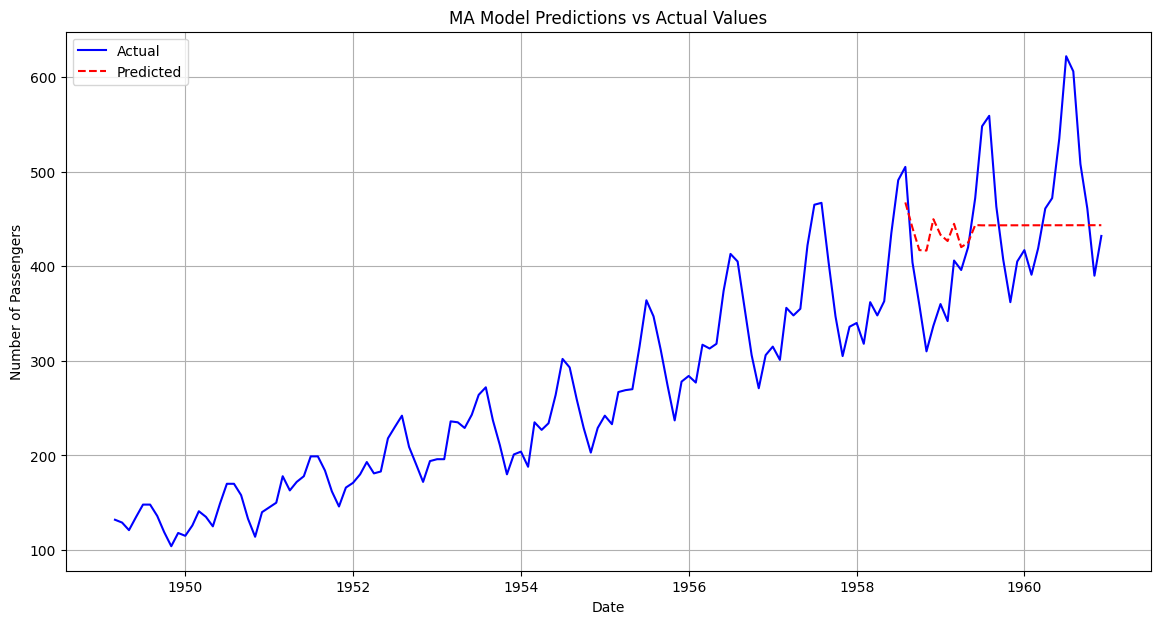

In [ ]:

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['#Passengers'], label='Actual', color='blue')
plt.plot(test.index, test['ma_predictions'], label='Predicted', color='red', linestyle='--')
plt.title('MA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast_steps = 12
forecast_values = []

forecast_last_value = df['#Passengers'].iloc[-1]

# Use the MA model to predict future values iteratively
for i in range(forecast_steps):
    future_date = df.index[-1] + pd.DateOffset(months=i + 1)
    future_diff = forecast_last_value - df['#Passengers'].iloc[-1]
    future_data = pd.Series([future_diff], index=[future_date])

    # Update train_diff2 with the new forecast value
    extended_train_diff2 = pd.concat([train_diff2, future_data])

    # Predict the next value
    forecast_diff2 = ma_fit.predict(start=len(extended_train_diff2) - 1, end=len(extended_train_diff2))
    forecast_value = forecast_diff2.iloc[0] + forecast_last_value

    # Update the forecast values list
    forecast_values.append(forecast_value)

    # Update the last known value for the next iteration
    forecast_last_value = forecast_value

# Create DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=['Forecast'])



In [ ]:
forecast_df

,Forecast
1961-01-31,408.443787
1961-02-28,384.887574
1961-03-31,361.331361
1961-04-30,337.775148
1961-05-31,314.218935
1961-06-30,290.662722
1961-07-31,267.106509
1961-08-31,243.550296
1961-09-30,219.994083
1961-10-31,196.437870


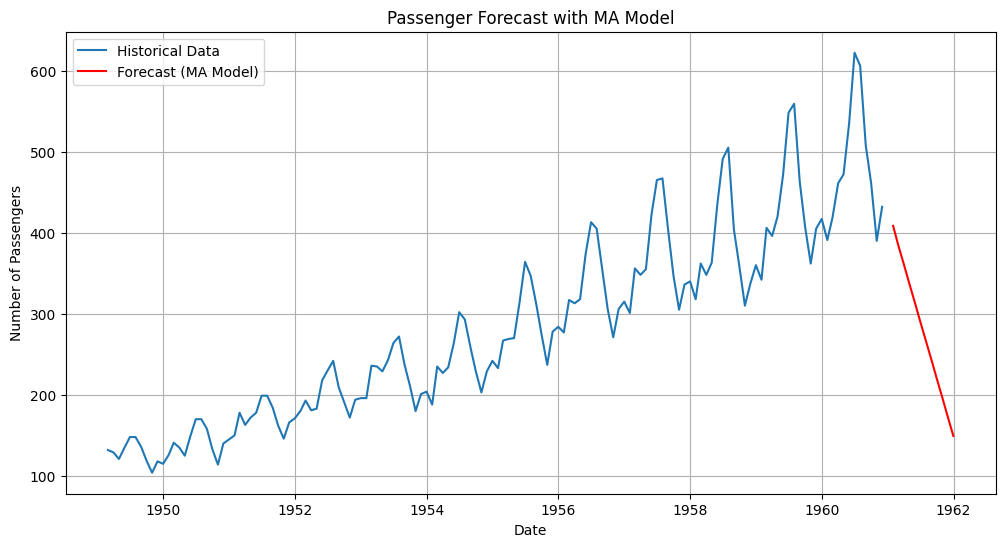

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['#Passengers'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast (MA Model)')
plt.title('Passenger Forecast with MA Model')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

#ARMA model
**Theory:** Combines AR and MA models. It uses both past values and past forecast errors to predict future values.

**Equation:**

$$
X_t = c + \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}
$$

**Parameters:**

- **$\phi$**: AR coefficients  
- **$\theta$**: MA coefficients  
- **$p$**: AR order  
- **$q$**: MA order


In [ ]:
# Fit the ARMA model
arma_model = ARIMA(train['pass_diff2'].dropna(), order=(11, 0, 12))
arma_fit = arma_model.fit()

# Print the summary of the fitted model
print(arma_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:             pass_diff2   No. Observations:                  113
Model:               ARIMA(11, 0, 12)   Log Likelihood                -426.089
Date:                Mon, 12 Aug 2024   AIC                            902.177
Time:                        04:11:12   BIC                            970.362
Sample:                    03-01-1949   HQIC                           929.846
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.034      0.377      0.706      -0.054       0.080
ar.L1         -0.9266      0.140     -6.598      0.000      -1.202      -0.651
ar.L2         -0.9888      0.069    -14.283      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Make predictions on the test set
arma_predictions_diff2 = arma_fit.predict(start=len(train['pass_diff2']), end=len(train['pass_diff2']) + len(test['pass_diff2']) - 1)

# Convert the differenced predictions back to the original scale
last_known_value = df['#Passengers'].iloc[split_point - 1]
arma_predictions_cumsum = arma_predictions_diff2.cumsum() + last_known_value

# Add the predictions to the test DataFrame
test['arma_predictions'] = arma_predictions_cumsum
print(test.head())

            #Passengers  pass_diff1  pass_diff2  ar_predictions  \
Month                                                             
1958-08-01          505        14.0       -42.0      437.465792   
1958-09-01          404      -101.0      -115.0      366.684504   
1958-10-01          359       -45.0        56.0      369.670230   
1958-11-01          310       -49.0        -4.0      390.709913   
1958-12-01          337        27.0        76.0      467.794494   

            ma_predictions  arma_predictions  
Month                                         
1958-08-01      467.443787        428.692330  
1958-09-01      440.591039        371.382256  
1958-10-01      417.043963        368.628864  
1958-11-01      416.586140        391.758488  
1958-12-01      449.707845        466.120033  


<ipython-input-39-593161c99e7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arma_predictions'] = arma_predictions_cumsum


In [ ]:
arma_rmse = sqrt(mean_squared_error(test['#Passengers'], test['arma_predictions']))
print(f'ARMA Model RMSE: {arma_rmse}')

ARMA Model RMSE: 76.99920405624697


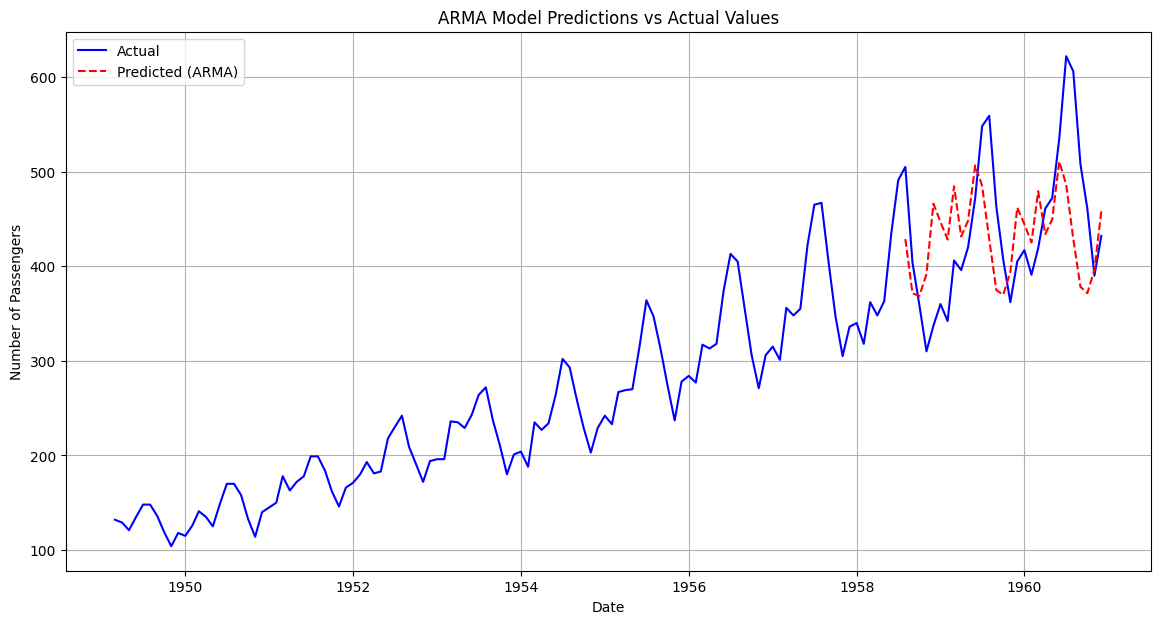

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['#Passengers'], label='Actual', color='blue')
plt.plot(test.index, test['arma_predictions'], label='Predicted (ARMA)', color='red', linestyle='--')
plt.title('ARMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()